説明資料パワポ用の図を作成するノートブック

In [289]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, confusion_matrix
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time


plt.rcParams["legend.fontsize"] = "large"
plt.rcParams["axes.labelsize"] = 15

In [290]:
iris = pd.read_csv("iris.csv")

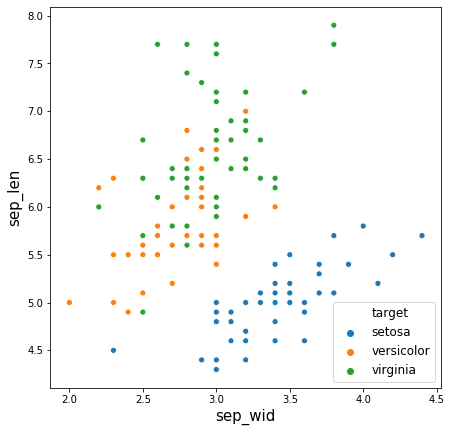

In [291]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x="sep_wid", y="sep_len", hue="target", data=iris, ax=ax)

In [208]:
data = iris.loc[iris.target!="setosa",:]

In [293]:
idx = [1,2,3,4,60,61,62,63]
cols = ["sep_wid", "sep_len", "target"]
data[cols].iloc[idx,:]

,sep_wid,sep_len,target
51,3.2,6.4,versicolor
52,3.1,6.9,versicolor
53,2.3,5.5,versicolor
54,2.8,6.5,versicolor
110,3.2,6.5,virginia
111,2.7,6.4,virginia
112,3.0,6.8,virginia
113,2.5,5.7,virginia


In [305]:
def calc_score(w1, w2, w3, dat):
    score = dat.sep_wid * w1 + dat.sep_len * w2 + w3
    return score, ["versicolor" if i > 0 else "virginia" for i in score]

In [306]:
data["score"], data["prediction"] = calc_score(*model_1, data)
print(f"重み  {model_1}")
data[["sep_len", "sep_wid", "target", "score", "prediction"]].iloc[idx,:]

重み  (-1.5, 1, -2)


/Users/hotoku/anaconda3/envs/misc/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sep_len,sep_wid,target,score,prediction
51,6.4,3.2,versicolor,-0.40,virginia
52,6.9,3.1,versicolor,0.25,versicolor
53,5.5,2.3,versicolor,0.05,versicolor
54,6.5,2.8,versicolor,0.30,versicolor
110,6.5,3.2,virginia,-0.30,virginia
111,6.4,2.7,virginia,0.35,versicolor
112,6.8,3.0,virginia,0.30,versicolor
113,5.7,2.5,virginia,-0.05,virginia


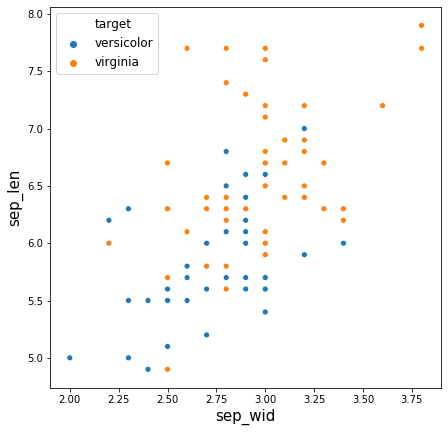

In [281]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x="sep_wid", y="sep_len", hue="target", data=data)

In [210]:
clf = LogisticRegression(penalty="none", solver="lbfgs")

In [211]:
X = data[["sep_wid", "sep_len"]]
y = data.target.map(dict(versicolor=0, virginia=1))

In [212]:
fit = clf.fit(X, y)

In [213]:
model_best = -fit.coef_[0][0] / fit.coef_[0][1], -fit.intercept_ / fit.coef_[0][1]

In [227]:
def abline(a, b, axes, **kwargs):
    x_vals = np.array(axes.get_xlim())
    y_vals = a * x_vals + b
    axes.plot(x_vals, y_vals, **kwargs)

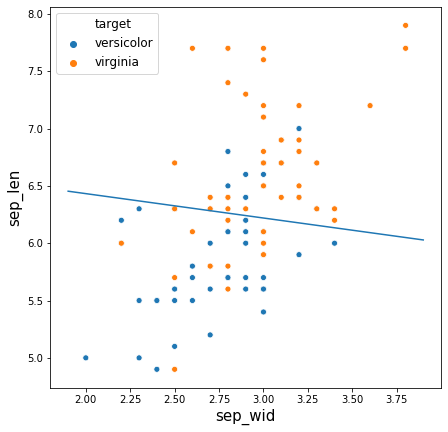

In [228]:
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="sep_wid", y="sep_len", hue="target", data=data, ax=ax)
abline(*model_best, ax)

In [238]:
def eval_model(X, y, w1, w2, c):
    logit = X.iloc[:,0] * w1 + X.iloc[:,1] * w2 + c
    pred = np.zeros_like(logit)
    pred[logit > 0] = 1
    return accuracy_score(y, pred), confusion_matrix(y, pred)

In [239]:
def calc_ab(w1, w2, c):
    return -w1 / w2, -c / w2

ウェイト：(-1.5, 1, -2)
正解率：0.62


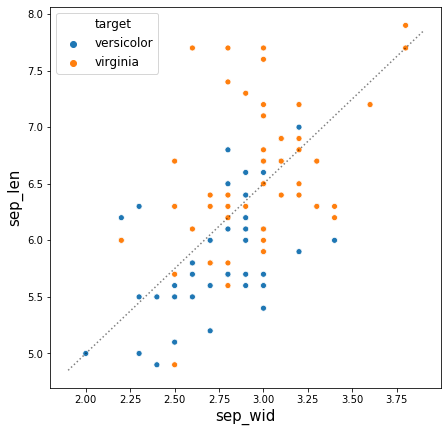

In [241]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x="sep_wid", y="sep_len", hue="target", data=data, ax=ax)
model_1 = -1.5, 1, -2
abline(*calc_ab(*model_1), ax, linestyle="dotted", color="black", alpha=0.5)
print(f"ウェイト：{model_1}")
print(f"正解率：{eval_model(X, y, *model_1)[0]}")

ウェイト：(0.1, 1, -7)
正解率：0.65


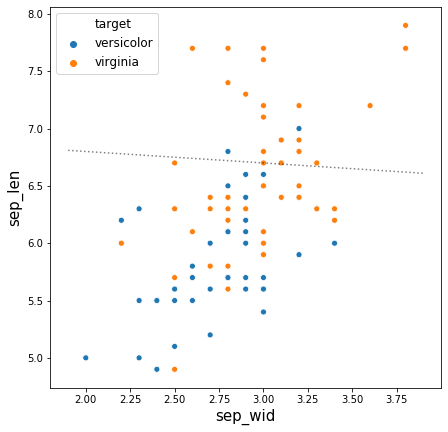

In [254]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x="sep_wid", y="sep_len", hue="target", data=data, ax=ax)
model_2 = 0.1, 1, -7
abline(*calc_ab(*model_2), ax, linestyle="dotted", color="black", alpha=0.5)
print(f"ウェイト：{model_2}")
print(f"正解率：{eval_model(X, y, *model_2)[0]}")

ウェイト：(1, 1, -9)
正解率：0.71


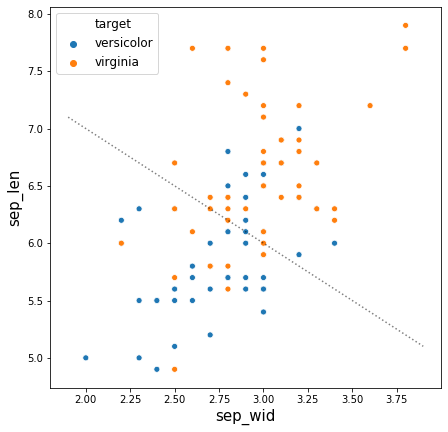

In [268]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x="sep_wid", y="sep_len", hue="target", data=data, ax=ax)
model_4 = 1, 1, -9
abline(*calc_ab(*model_4), ax, linestyle="dotted", color="black", alpha=0.5)
print(f"ウェイト：{model_4}")
print(f"正解率：{eval_model(X, y, *model_4)[0]}")

ウェイト：(0.40466144107702967, 1.9023755189800282, -13.046036603555486)
正解率：0.75


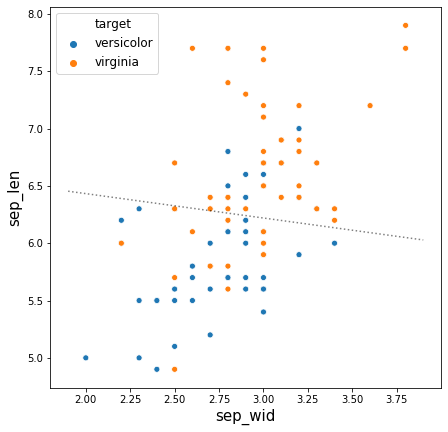

In [253]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x="sep_wid", y="sep_len", hue="target", data=data, ax=ax)
model_3 = fit.coef_[0][0], fit.coef_[0][1], fit.intercept_[0]
abline(*calc_ab(*model_3), ax, linestyle="dotted", color="black", alpha=0.5)
print(f"ウェイト：{model_3}")
print(f"正解率：{eval_model(X, y, *model_3)[0]}")

In [172]:
eval_model(X, y, *model_best)

(0.75, array([[38, 12],
        [13, 37]]))

In [173]:
model_best

(-0.21271375553339317, array([6.85776098]))